In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts_donors/"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta.tsv"

sample_names = "Control,Flt3l,Input"

input_col = "Input"


In [2]:
sample_names = sample_names.split(",")
sample_names

['Control', 'Flt3l', 'Input']

In [3]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
%matplotlib inline

In [5]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,ATAC_snn_res.0.8,nuclear_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name
Control_AAACGAAAGAATCAGT-1,Control,1972,1972,6432,1259,31,19,266,1066,3791,...,6,6,2211,1942,AAACGAAAGAATCAGT-1_Control,Control_AAACGAAAGAATCAGT-1,4,1,Control,1_4
Control_AAACGAAAGCATACCT-1,Control,2674,2674,11858,1937,51,34,549,3102,6185,...,7,7,3311,2750,AAACGAAAGCATACCT-1_Control,Control_AAACGAAAGCATACCT-1,30,1,Control,1_30
Control_AAACGAAAGCGAGAAA-1,Control,1939,1939,7365,1097,25,27,275,2184,3757,...,7,7,2112,1838,AAACGAAAGCGAGAAA-1_Control,Control_AAACGAAAGCGAGAAA-1,15,0,Control,0_15
Control_AAACGAAAGTACAGAT-1,Control,862,862,4095,861,16,16,230,771,2201,...,4,4,1441,1317,AAACGAAAGTACAGAT-1_Control,Control_AAACGAAAGTACAGAT-1,9,0,Control,0_9
Control_AAACGAAAGTACAGTA-1,Control,1775,1775,8088,1091,27,27,369,2157,4417,...,6,6,2385,2085,AAACGAAAGTACAGTA-1_Control,Control_AAACGAAAGTACAGTA-1,17,1,Control,1_17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3585,3585,17067,3257,63,80,461,8097,5109,...,3,3,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,6,0,Input,0_6
Input_TTTGTGTTCCTGAAAC-1,Input,4362,4362,30427,8323,84,99,799,12146,8976,...,11,11,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,11,0,Input,0_11
Input_TTTGTGTTCGGGAAAC-1,Input,8047,8047,40114,14032,169,160,1561,10102,14090,...,3,3,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,37,0,Input,0_37
Input_TTTGTGTTCGGGACAA-1,Input,3303,3303,22721,4421,43,84,546,11692,5935,...,4,4,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,3,1,Input,1_3


In [6]:
se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,ATAC_snn_res.0.8,nuclear_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name
Input_AAACGAAAGATATGAC-1,Input,2858,2858,29954,4853,67,103,626,19521,4784,...,2,2,3172,2505,AAACGAAAGATATGAC-1_Input,Input_AAACGAAAGATATGAC-1,17,1,Input,1_17
Input_AAACGAAAGTAATGTG-1,Input,6511,6511,32111,9018,96,122,1319,11232,10324,...,2,2,7161,4861,AAACGAAAGTAATGTG-1_Input,Input_AAACGAAAGTAATGTG-1,12,1,Input,1_12
Input_AAACGAAAGTAGTCGG-1,Input,7561,7561,37923,12542,147,162,1705,10189,13178,...,3,3,8960,5447,AAACGAAAGTAGTCGG-1_Input,Input_AAACGAAAGTAGTCGG-1,29,1,Input,1_29
Input_AAACGAACACATTGCA-1,Input,6920,6920,46206,12553,148,184,1239,16880,15202,...,13,13,10041,5539,AAACGAACACATTGCA-1_Input,Input_AAACGAACACATTGCA-1,0,1,Input,1_0
Input_AAACGAACACGCTCAG-1,Input,5875,5875,38973,7584,162,150,973,19691,10413,...,2,2,7103,4786,AAACGAACACGCTCAG-1_Input,Input_AAACGAACACGCTCAG-1,0,0,Input,0_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3585,3585,17067,3257,63,80,461,8097,5109,...,3,3,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,6,0,Input,0_6
Input_TTTGTGTTCCTGAAAC-1,Input,4362,4362,30427,8323,84,99,799,12146,8976,...,11,11,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,11,0,Input,0_11
Input_TTTGTGTTCGGGAAAC-1,Input,8047,8047,40114,14032,169,160,1561,10102,14090,...,3,3,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,37,0,Input,0_37
Input_TTTGTGTTCGGGACAA-1,Input,3303,3303,22721,4421,43,84,546,11692,5935,...,4,4,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,3,1,Input,1_3


In [7]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "donor"]).size()
group_counts

nuclear_clusters  donor
0                 0          25
                  1          15
1                 0          46
                  1          27
2                 0         928
                  1         967
3                 0        1352
                  1         589
4                 0          23
                  1          37
5                 0          56
                  1          56
6                 0          58
                  1          49
7                 0         124
                  1         281
8                 0          47
                  1          52
9                 0           4
                  1           4
10                0          43
                  1           8
11                0         310
                  1         315
12                0         199
                  1          57
13                0         174
                  1          43
14                0          24
                  1          37
dtype: int64

### Remove None before normalizing

In [8]:
def plots(df, name):
    donors = df["donor"].unique()
    f, ax = plt.subplots(figsize=(12,12), ncols=len(donors))
    count = 0
    for d, val in df.groupby("donor"):
        val.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax[count])
        ax[count].set_title(f"Donor {d}")
        count += 1
        
    plt.savefig(join(outdir, name+"barplot_clones.png"))
    return

In [9]:
clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_df

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=10]


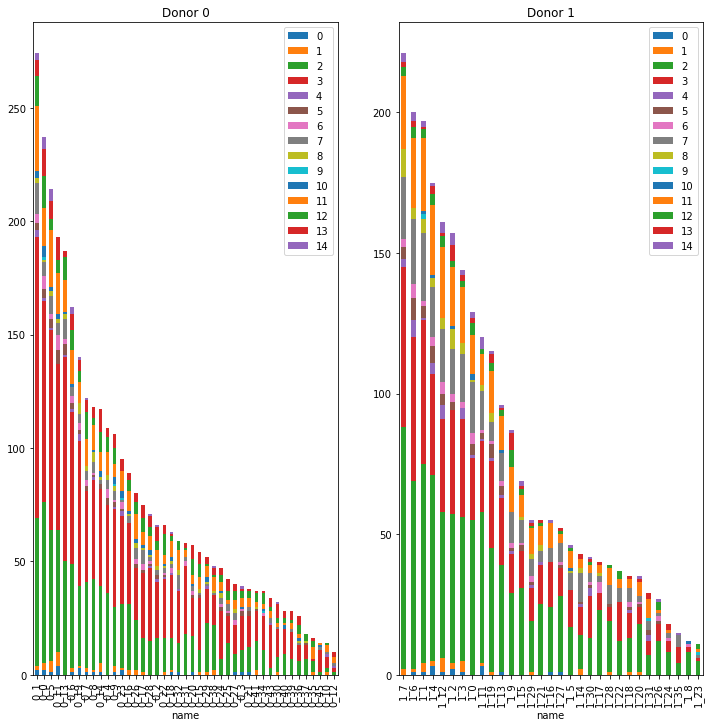

In [10]:
%matplotlib inline
plots(clone_counts_filt_10_df,
      name="clone_cluster_counts")

# Normalize per clone

In [11]:
clone_sums = clone_counts.groupby("name").sum()["ncells"]
clone_sums

name
0_0     237
0_1     274
0_10     14
0_11    193
0_12     10
       ... 
1_5      46
1_6     200
1_7     221
1_8      12
1_9      87
Name: ncells, Length: 79, dtype: int64

In [12]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["name"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["nuclear_clusters", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df.head()


sum of normed values nuclear_clusters  donor
0                 0         0.251766
                  1         0.125943
1                 0         0.582261
                  1         0.276786
2                 0        11.242311
                  1        14.493239
3                 0        17.407934
                  1         7.874596
4                 0         0.389032
                  1         0.405618
5                 0         0.622821
                  1         0.592790
6                 0         0.590254
                  1         0.874811
7                 0         1.614879
                  1         3.706386
8                 0         0.623270
                  1         0.435957
9                 0         0.051207
                  1         0.135544
10                0         0.593176
                  1         0.148153
11                0         4.208929
                  1         3.559248
12                0         2.945524
                  1         1.

,donor,ncells,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
name,,,,,,,,,,,,,,,,,
0_0,0,1.0,0.008439,0.012658,0.299578,0.375527,0.004219,0.016878,0.025316,0.025316,0.004219,0.004219,0.021097,0.071730,0.059072,0.050633,0.021097
1_13,1,1.0,0.010417,0.000000,0.395833,0.250000,0.010417,0.031250,0.020833,0.104167,0.000000,0.000000,0.010417,0.125000,0.020833,0.010417,0.010417
1_2,1,1.0,0.012739,0.012739,0.337580,0.235669,0.000000,0.019108,0.019108,0.101911,0.044586,0.000000,0.006369,0.133758,0.012739,0.038217,0.025478
1_19,1,1.0,0.000000,0.008696,0.382609,0.269565,0.008696,0.043478,0.008696,0.060870,0.026087,0.000000,0.000000,0.130435,0.026087,0.026087,0.008696
1_18,1,1.0,0.000000,0.028571,0.342857,0.257143,0.028571,0.028571,0.057143,0.142857,0.000000,0.000000,0.000000,0.085714,0.000000,0.028571,0.000000


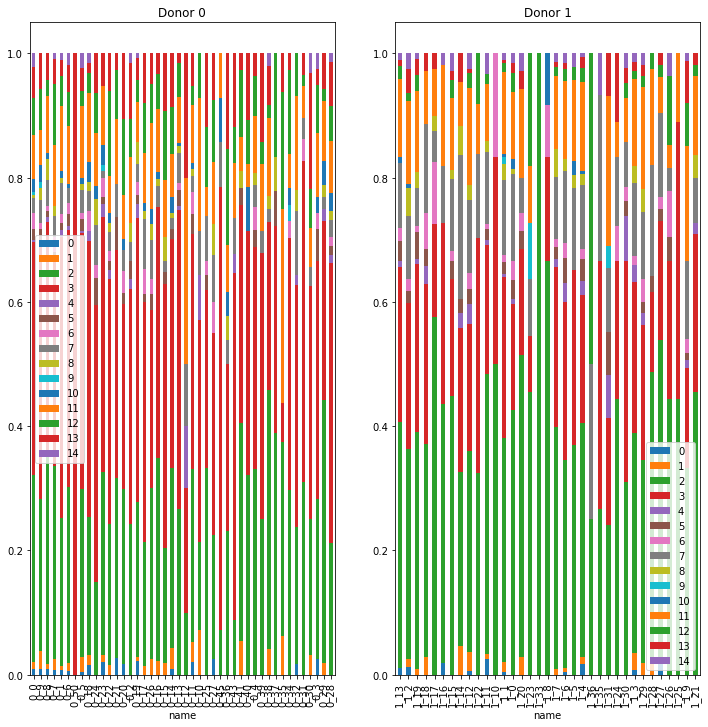

In [13]:
plots(clone_norm_df,
      name="normalized_counts")

## Only top clones

In [14]:
cell_25 = keep_top_clones(clone_counts_filt_10_df, min_cell=25).index

In [15]:
# from sklearn.datasets import make_blobs
# import colorcet as cc
# import matplotlib.pyplot as plt
# import seaborn as sns

#https://stackoverflow.com/questions/68209351/how-to-make-a-color-map-with-many-unique-colors-in-seaborn
#palette = sns.color_palette(cc.glasbey, n_colors=25)


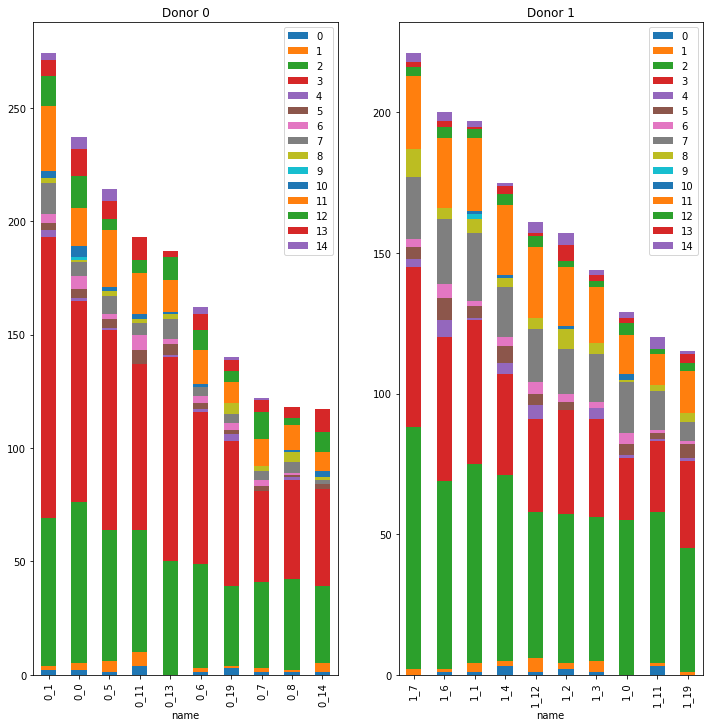

In [16]:
plots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=25),
      name="top20_minCell25_clone_counts")

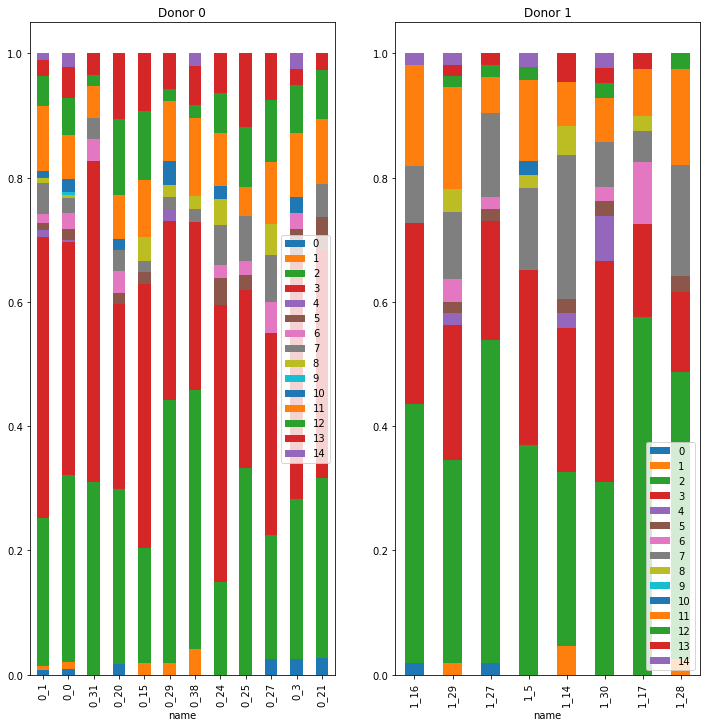

In [17]:
plots(keep_top_clones(clone_norm_df.loc[cell_25], n_top=20, min_cell=0),
     name="top20_minCell25_clone_normalized_counts")

## Distribution of counts by cluster

---

---

---

---

In [18]:
outdir

'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts_donors/'